Most of the information in this notebook is taken from the [QISKIT Textbook](https://qiskit.org/textbook), which is available for free!
<p style="font-size:30px;">IMPORTANT</p>

Please run/render this notebook yourself in IBM Quantum Experience Jupyter Notebooks or JupyterLab/Elyra as GitHub doesn't properly render it.

If you wanto to use IBM Quantum Experience, please follow the instructions below (it is free of charge and your account never expires, also no credit card needed)

1. [Create an account on the IBM Quantum Experience](https://quantum-computing.ibm.com?cm_mmc=Email_Events-_-Developer_Innovation-_-WW_WW-_-romeo-kienzler\CourseraCouraseAppliedAIusingDeepLearning\unknown\unknown\unknown\unknown\online\unknown&cm_mmca1=000019RS&cm_mmca2=10004805&cm_mmca3=M99938765&cvosrc=email.Events.M99938765&cvo_campaign=000019RS) (your registration will be tracked/analyzed in favour of myself) you can use [this link](https://quantum-computing.ibm.com) without being tracked

Note: The build of the JupyterLab environment below is currently broken. Please use IBM Quantum Experience for now until this is fixed.

A fast way to get jupyterlab up and running is using docker:

Setup (run only once):  
git clone https://github.com/romeokienzler/DockerizeIT.git  
cd DockerizeIT  
cd elyra-ai  
./build.sh  
docker volume create elyra

Start:  
docker run -it -p 8888:8888 -v elyra:/home/jovyan/work elyra-ai jupyter-lab

<p/>
<p style="font-size:50px;">Quantum Machine Learning</p>


<table><tr>
    <td>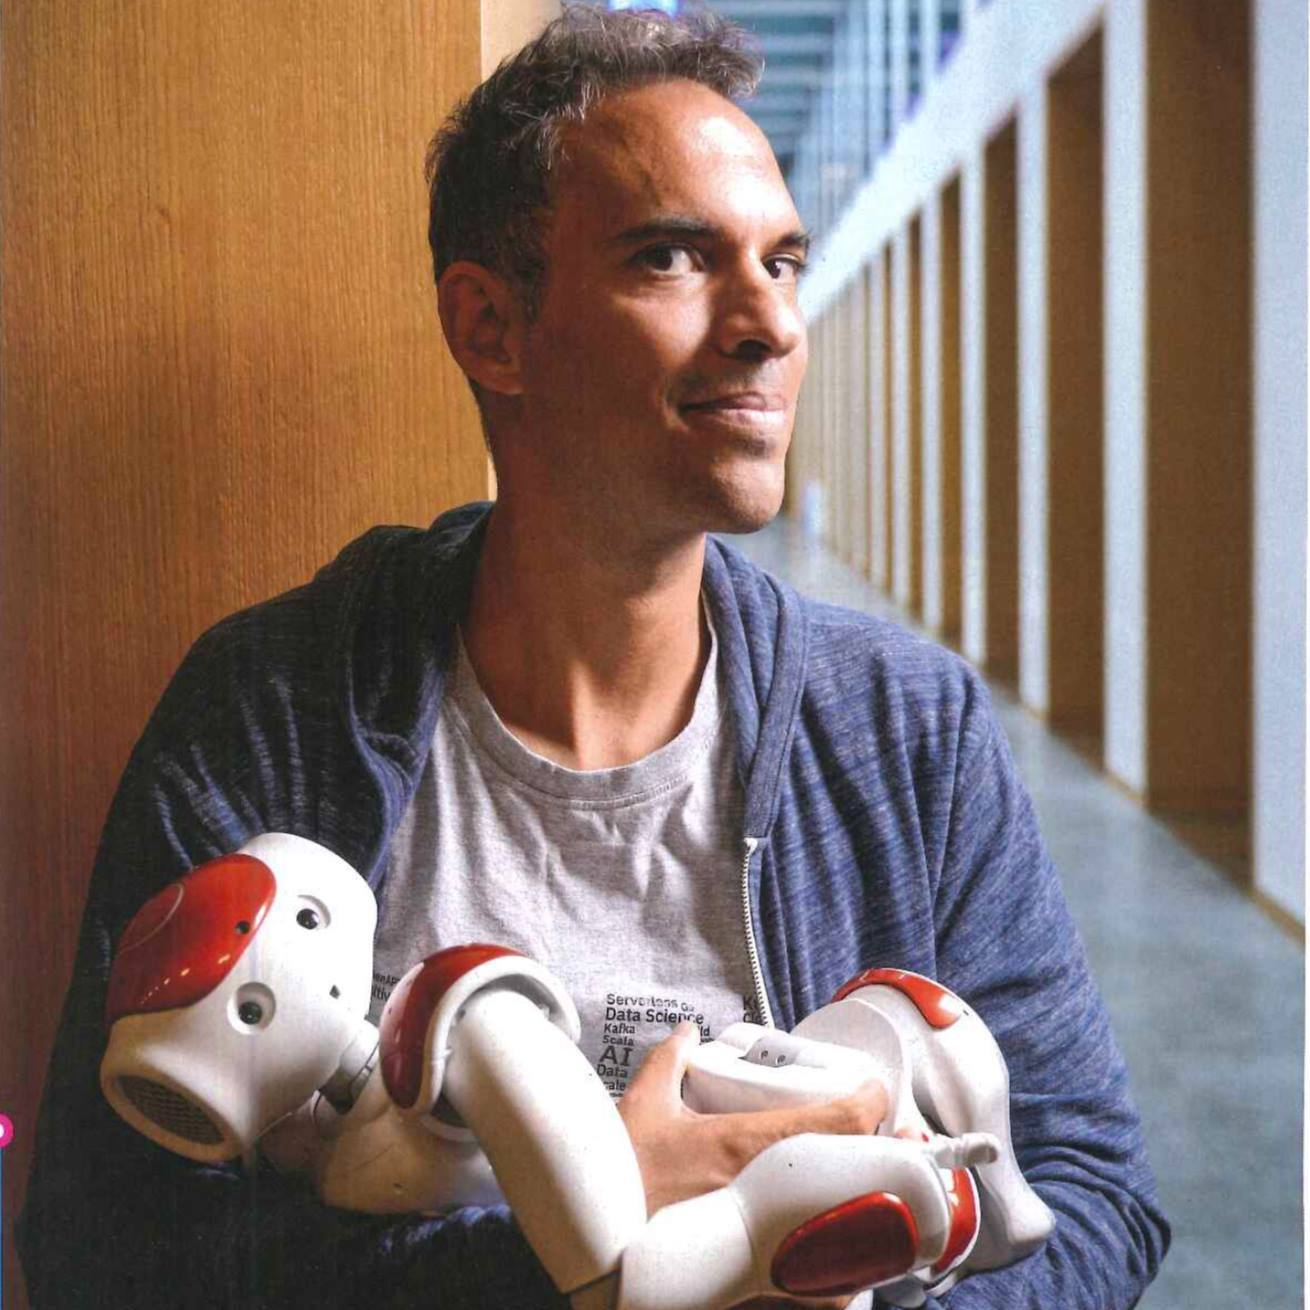</td>
    <td>Romeo Kienzler<br/>Chief Data Scientist<br/>IBM Center for Open Source Data and AI Technologies</td>
</tr></table></div>

# Recap: Quantum Physics
This is a very short intro to repeat the basic concepts

## Superposition
Definition: Any two (or more) quantum states can be superimposed resulting in another valid quantum state.

Example: A photon is in "spin up" and "spin down" state at the same time. Once measured it collapses into one state (cat state)


![](https://upload.wikimedia.org/wikipedia/commons/e/e2/Wigner_function_of_a_Schr%C3%B6dinger_cat_state.gif)

## Entanglement
Definition: Physical properties like position, momentum, spin, and polarization between two (or more) quantum particles are correlated
Example: When the spin of one of two photons entangled photons is measured, the spin of the other photon is oposite (spooky action at a distance)

![](https://upload.wikimedia.org/wikipedia/commons/2/2d/SPDC_figure.png)
[Spontaneous Parametric Down Conversion](https://en.wikipedia.org/wiki/Spontaneous_parametric_down-conversion) in a special type of (nonlinear) crystal can be used to produce entangled photons

# Quantum Computing Hardware
Photons make very bad Qubits. Therefore we need something else.

Idea: 
- Use a LC circuit, use superconducting materials and cool it down ![](https://upload.wikimedia.org/wikipedia/commons/thumb/b/b2/LC_parallel_simple.svg/440px-LC_parallel_simple.svg.png)
- LC circuit consists of inductance (L) (e.g. a coil) and a capacitor (C)
- Acts as electrical resonator (like a tuning fork)![tunig fork](https://upload.wikimedia.org/wikipedia/commons/b/b2/TuningFork659Hz.jpg)) 


## Superconducting Qubits - Transmon
Definition Superconductivity: Electrical resistance vanishes and magnetic flux fields are expelled

Result: A superconductive LC circuit will retain energy (once activated) for a very long period of time. Energy level correlates with frequency

Idea: Use two energy levels as two Qubit states

Problem: In a coil electrical flux is linear to voltage. Therefore, separation between quantum states is hard.

Solution: Using a [Josephson junction](https://en.wikipedia.org/wiki/Josephson_effect) instead of a coil to introduce a non-linear inductivity

![](https://angstromengineering.com/wp-content/uploads/2019/02/SEM-transmon-qubit-angstrom-engineering.jpg)

![](https://blog.qutech.nl/wp-content/uploads/2017/05/circuit_energy_levels-01.png)

# What is a Qubit?

## Recap: Classical bits

- How do we represent 9213?
- 9000+200+10+3 = 9213
- $ 9213 = (9*10^3)+(2*10^2)+(1*10^1)+(3*10^0) $
- $ 9213 = (1*2^{13})+(0*2^{12})+(0*2^{11})+(0*2^{10})+(1*2^9)+(1*2^8)+(1*2^7)+(1*2^6)+(1*2^5)+(1*2^4)+(1*2^3)+(1*2^2)+(0*2^1)+(1*2^0)$

## Exercise
Run the code below and try to produce the numer 123

In [ ]:
from qiskit_textbook.widgets import binary_widget
binary_widget(nbits=7)

## The Qubit State
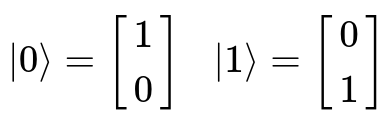

 and  Bracket notation by Dirac to indicate Qubit

## A more complex Qubit state
$ |q_0\rangle = \begin{bmatrix} \tfrac{1}{\sqrt{2}} \\ \tfrac{i}{\sqrt{2}} \end{bmatrix}$ 

### Recap: Linear Algebra
Matrix Addition:

$ |a\rangle = \begin{bmatrix}a_0 \\ a_1 \\ \vdots \\ a_n \end{bmatrix}, \quad     |b\rangle = \begin{bmatrix}b_0 \\ b_1 \\ \vdots \\ b_n \end{bmatrix} $

$ |a\rangle + |b\rangle = \begin{bmatrix}a_0 + b_0 \\ a_1 + b_1 \\ \vdots \\ a_n + b_n \end{bmatrix} $

Vector Scalar Multiplication:

$ x|a\rangle = \begin{bmatrix}x \times a_0 \\ x \times  a_1 \\ \vdots \\ x \times  a_n \end{bmatrix} $

Orthonormal Basis (orthogonal and normalised):

![](https://qiskit.org/textbook/ch-states/images/basis.svg)

$ |0\rangle $  and $ |1\rangle $ are linearly independent.

Because $ |0\rangle $  and $ |1\rangle $ span a orthonormal basis, we can represent any 2D vector with a combination of these two states. This allows us to write the state of our qubit in the alternative form:

$ |q_0\rangle = \begin{bmatrix} \tfrac{1}{\sqrt{2}} \\ \tfrac{i}{\sqrt{2}} \end{bmatrix} = \tfrac{1}{\sqrt{2}}|0\rangle + \tfrac{i}{\sqrt{2}}|1\rangle$ 


## The Qubit Representation
So in general, a Qubit can be mathematically representated as:

 $ |q\rangle = \alpha|0\rangle + \beta|1\rangle $ 
 
 Please also note that $ \alpha $ and $ \beta $ are complex numbers: $ \alpha, \beta \in \mathbb{C} $

Congratulations! 

$ |q_0\rangle $ can be used to express *superposition* between two states. Note: The coefficients represent probability to find the Qubit in a specific state once measured. To obtain the probability we can use: $ p(|x\rangle) = | \langle x| \psi \rangle|^2 $. In other words, we need to square the coefficients to obtain a probability.

The following code will render a [Bloch sphere](https://en.wikipedia.org/wiki/Bloch_sphere) which is used to visualize the state of a Qubit:

In [ ]:
from qiskit_textbook.widgets import plot_bloch_vector
from math import pi
plot_bloch_vector([1, 0, 0]) 

Note that the state space of a Qubit is superior to the one of a classical bit. This should act as a little glimpse for you into the potential power of quantum computing.

# Quantum Logic Gates

## Single Qubit Gates
Source: https://qiskit.org/textbook/ch-states/single-qubit-gates.html

### X-Gate
The X Gate can be viewed as a bit flip operator as it mirrors the state vector of a qubit up and down on the bloch sphere

In [ ]:
from qiskit import QuantumCircuit, execute, Aer
from qiskit.visualization import plot_histogram, plot_bloch_vector
qc = QuantumCircuit(3)
qc.x(1)
qc.x(2)
qc.x(2)
qc.draw('mpl')

In [ ]:
from qiskit.visualization import  plot_bloch_multivector
backend = Aer.get_backend('statevector_simulator')
out = execute(qc,backend).result().get_statevector()
plot_bloch_multivector(out)

### Y and Z Gate

In [ ]:
qc = QuantumCircuit(4)
qc.x(1)
qc.y(2) # Do Y-gate on qubit 0
qc.z(3) # Do Z-gate on qubit 0
qc.draw('mpl')

In [ ]:
out = execute(qc,backend).result().get_statevector()
plot_bloch_multivector(out)

### The Hadamard Gate
The Hadamard gate sets a single qubit into superposition

In [ ]:
qc = QuantumCircuit(2)
qc.h(0)
qc.h(1)
qc.y(1)
qc.draw('mpl')

In [ ]:
out = execute(qc,backend).result().get_statevector()
plot_bloch_multivector(out)

## Multi-Qubit States 

To describe the state of two qubits it requires four complex amplitudes. We store these amplitudes in a 4D-vector:

$ |a\rangle = a_{00}|00\rangle + a_{01}|01\rangle + a_{10}|10\rangle + a_{11}|11\rangle = \begin{bmatrix} a_{00} \\ a_{01} \\ a_{10} \\ a_{11} \end{bmatrix} $

In [ ]:
qc = QuantumCircuit(2)
# Apply H-gate to the first:
qc.h(0)
qc.draw('mpl')

In [ ]:
from qiskit_textbook.tools import array_to_latex
backend = Aer.get_backend('statevector_simulator')
final_state = execute(qc,backend).result().get_statevector()
# Print the statevector neatly:
array_to_latex(final_state, pretext="\\text{Statevector = }")

## Multi-Qubit Gates

### CNOT - Gate
Performs X - Gate on 2nd qubit if 1st (control) qubit is one.

In [ ]:
qc = QuantumCircuit(2)
# Apply CNOT
qc.cx(0,1)
# See the circuit:
qc.draw('mpl')

In [ ]:
# Let's see the result:
backend = Aer.get_backend('statevector_simulator')
final_state = execute(qc,backend).result().get_statevector()
# Print the statevector neatly:
array_to_latex(final_state, pretext="\\text{Statevector = }")

In [ ]:
qc = QuantumCircuit(2)
# Apply H-gate to the first:
qc.h(0)
# Apply a CNOT:
qc.cx(0,1)
qc.draw('mpl')

In [ ]:
# Let's see the result:
backend = Aer.get_backend('statevector_simulator')
final_state = execute(qc,backend).result().get_statevector()
# Print the statevector neatly:
array_to_latex(final_state, pretext="\\text{Statevector = }")

In [ ]:
results = execute(qc,backend).result().get_counts()
plot_histogram(results)

## Exercise
1. Login to IBM Quantum Experience (see instructions above)
1. [Create your first quantum circuit](https://quantum-computing.ibm.com/docs/iqx/first-circuit)
1. [Code your first quantum circuit](https://quantum-computing.ibm.com/docs/iql/first-circuit) 
1. Build a Quantum Eightball (follow step 2 and 3) => https://github.com/JavaFXpert/workshop#quantum-game-challenge-build-a-quantum-8-ball

### Advanced material for C-NOT

In [ ]:
from qiskit import QuantumCircuit, Aer, execute
from math import pi
import numpy as np
from qiskit.visualization import plot_bloch_multivector, plot_histogram
# In Jupyter Notebooks we can display this nicely using Latex.
# If not using Jupyter Notebooks you may need to remove the 
# array_to_latex function and use print() instead.
from qiskit_textbook.tools import array_to_latex


In [ ]:
qc = QuantumCircuit(2)
qc.h(0)
qc.h(1)
qc.cx(0,1)
qc.draw('mpl')

In [ ]:
statevector_backend = Aer.get_backend('statevector_simulator')
final_state = execute(qc,statevector_backend).result().get_statevector()
array_to_latex(final_state, pretext="\\text{Statevector} = ", precision=1)
plot_bloch_multivector(final_state)

In [ ]:
results = execute(qc,statevector_backend).result().get_counts()
plot_histogram(results)

In [ ]:
qc = QuantumCircuit(2)
qc.h(0)
qc.x(1)
qc.h(1)
qc.draw('mpl')

In [ ]:
final_state = execute(qc,statevector_backend).result().get_statevector()
array_to_latex(final_state, pretext="\\text{Statevector} = ", precision=1)
plot_bloch_multivector(final_state)

In [ ]:
results = execute(qc,statevector_backend).result().get_counts()
plot_histogram(results)

In [ ]:
qc.cx(0,1)
display(qc.draw('mpl'))

In [ ]:
final_state = execute(qc,statevector_backend).result().get_statevector()
array_to_latex(final_state, pretext="\\text{Statevector} = ", precision=1)
plot_bloch_multivector(final_state)

In [ ]:
results = execute(qc,statevector_backend).result().get_counts()
plot_histogram(results)

# Quantum Algorithms

## The Deutsch-Jozsa Problem 

Given a black box function $ f(\{x_0,x_1,x_2,...\}) \rightarrow 0 \textrm{ or } 1 \textrm{ , where } x_n \textrm{ is } 0 \textrm{ or } 1 $ which either returns 0 or 1 for any input (constant function) or returns 0 for half of the possible inputs and 1 for the other half of possible inputs (balanced). Our task is to determine if $ f $ is constant or balanced.

### The Classical Solution

In the best case scenario, if we get  $ f(0,0,0,...)\rightarrow 0 $ and $f(1,0,0,...) \rightarrow 1$ we know that $f$ is balanced in two steps.

In the worst case scenario we need to test 50% + 1 of all inputs to be really sure that $f$ is not constance. If the 50% + 1'th test still returns the same value, it is constant, otherwise balanced.

As the probability of $f$ being constant is $P_\textrm{constant}(k) = 1 - \frac{1}{2^{k-1}} \qquad \textrm{for } k \leq 2^{n-1}$ we can also define a desired confidence and early stopping of the algorithm. For 100% confidence we need $2^{n-1}+1$ tests.

### The Quantum Computing Solution

In [ ]:
# initialization
import numpy as np

# importing Qiskit
from qiskit import IBMQ, BasicAer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, execute

# import basic plot tools
from qiskit.visualization import plot_histogram



In [ ]:
# set the length of the n-bit input string. 
n = 3

const_oracle = QuantumCircuit(n+1)

output = np.random.randint(2)
if output == 1:
    const_oracle.x(n)

const_oracle.draw('mpl')


In [ ]:
balanced_oracle = QuantumCircuit(n+1)
b_str = "101"

# Place X-gates
for qubit in range(len(b_str)):
    if b_str[qubit] == '1':
        balanced_oracle.x(qubit)
balanced_oracle.draw('mpl')


In [ ]:
balanced_oracle = QuantumCircuit(n+1)
b_str = "101"

# Place X-gates
for qubit in range(len(b_str)):
    if b_str[qubit] == '1':
        balanced_oracle.x(qubit)

# Use barrier as divider
balanced_oracle.barrier()

# Controlled-NOT gates
for qubit in range(n):
    balanced_oracle.cx(qubit, n)

balanced_oracle.barrier()

# Place X-gates
for qubit in range(len(b_str)):
    if b_str[qubit] == '1':
        balanced_oracle.x(qubit)

# Show oracle
balanced_oracle.draw('mpl')


In [ ]:
def dj_oracle(case, n):
    # We need to make a QuantumCircuit object to return
    # This circuit has n+1 qubits: the size of the input,
    # plus one output qubit
    oracle_qc = QuantumCircuit(n+1)
    
    # First, let's deal with the case in which oracle is balanced
    if case == "balanced":
        # First generate a random number that tells us which CNOTs to
        # wrap in X-gates:
        b = np.random.randint(1,2**n)
        # Next, format 'b' as a binary string of length 'n', padded with zeros:
        b_str = format(b, '0'+str(n)+'b')
        # Next, we place the first X-gates. Each digit in our binary string 
        # corresponds to a qubit, if the digit is 0, we do nothing, if it's 1
        # we apply an X-gate to that qubit:
        for qubit in range(len(b_str)):
            if b_str[qubit] == '1':
                oracle_qc.x(qubit)
        # Do the controlled-NOT gates for each qubit, using the output qubit 
        # as the target:
        for qubit in range(n):
            oracle_qc.cx(qubit, n)
        # Next, place the final X-gates
        for qubit in range(len(b_str)):
            if b_str[qubit] == '1':
                oracle_qc.x(qubit)

    # Case in which oracle is constant
    if case == "constant":
        # First decide what the fixed output of the oracle will be
        # (either always 0 or always 1)
        output = np.random.randint(2)
        if output == 1:
            oracle_qc.x(n)
    
    #oracle_gate = oracle_qc.to_gate()
    #oracle_gate.name = "Oracle" # To show when we display the circuit
    return oracle_qc

In [ ]:
def dj_algorithm(oracle, n):
    dj_circuit = QuantumCircuit(n+1, n)
    # Set up the output qubit:
    dj_circuit.x(n)
    dj_circuit.h(n)
    # And set up the input register:
    for qubit in range(n):
        dj_circuit.h(qubit)
    # Let's append the oracle gate to our circuit:
    dj_circuit.append(oracle, range(n+1))
    # Finally, perform the H-gates again and measure:
    for qubit in range(n):
        dj_circuit.h(qubit)
    
    for i in range(n):
        dj_circuit.measure(i, i)
    
    return dj_circuit


In [ ]:
n = 4
oracle_gate = dj_oracle('constant', n)
dj_circuit = dj_algorithm(oracle_gate, n)
dj_circuit.draw('mpl')


In [ ]:
backend = Aer.get_backend('statevector_simulator')
results = execute(dj_circuit, backend=backend, shots=1024).result()
answer = results.get_counts()
plot_histogram(answer)


### Exercise
Why is this algorithm working if not measuring the output even a single time?

### Understanding Phase-Kickback (intuition)

Source: https://qiskit.org/textbook/ch-gates/phase-kickback.html



In [ ]:
from qiskit import QuantumCircuit, Aer, execute
from math import pi
import numpy as np
from qiskit.visualization import plot_bloch_multivector, plot_histogram
# In Jupyter Notebooks we can display this nicely using Latex.
# If not using Jupyter Notebooks you may need to remove the 
# array_to_latex function and use print() instead.
from qiskit_textbook.tools import array_to_latex

qc = QuantumCircuit(2)
qc.h(0)
qc.h(1)
qc.cx(0,1)
display(qc.draw('mpl'))

# Let's see the result
statevector_backend = Aer.get_backend('statevector_simulator')
final_state = execute(qc,statevector_backend).result().get_statevector()
array_to_latex(final_state, pretext="\\text{Statevector} = ", precision=1)
plot_bloch_multivector(final_state)



In [ ]:
qc = QuantumCircuit(2)
qc.h(0)
qc.x(1)
qc.h(1)
display(qc.draw('mpl'))
# See the result
final_state = execute(qc,statevector_backend).result().get_statevector()
array_to_latex(final_state, pretext="\\text{Statevector} = ", precision=1)
plot_bloch_multivector(final_state)


In [ ]:
qc = QuantumCircuit(2)
qc.h(0)
qc.x(1)
qc.h(1)
qc.cx(0,1)
display(qc.draw('mpl'))
# See the result
final_state = execute(qc,statevector_backend).result().get_statevector()
array_to_latex(final_state, pretext="\\text{Statevector} = ", precision=1)
plot_bloch_multivector(final_state)


Works only 
1. For controlled gates
1. If Control qubit is in superposition state
1. If target qubit is in eigenvector state of controlled gate operation

### Exercise
The Deutsch-Jozsa problem is a generalization of the Deutsch Problem to an infinite number of qubits. Please solve the Deutsch problem for a single bit oracle. E.g. a function $f$ always returning zero or one is constant, $f$ returning the inverse of it's input is variable

In [ ]:
# set to zero 
qc = QuantumCircuit(2)

display(qc.draw('mpl'))


In [ ]:
# set to one 
qc = QuantumCircuit(2)
qc.x(1)
display(qc.draw('mpl'))

In [ ]:
# bit flip
qc = QuantumCircuit(2)
qc.x(0)
qc.cx(0,1)
display(qc.draw('mpl'))

In [ ]:
def d_oracle(case):
    
    oracle_qc = QuantumCircuit(2)
    
    if case == "constant":
        oracle_qc.x(1)


    # Case in which oracle is constant
    if case == "variable":
        oracle_qc.x(0)
        oracle_qc.cx(0,1)
    
    oracle_gate = oracle_qc.to_gate()
    oracle_gate.name = "Oracle" # To show when we display the circuit
    return oracle_gate

In [ ]:
def d_algorithm(oracle):
    d_circuit = QuantumCircuit(2, 1)
    d_circuit.x(1)
    d_circuit.h(1)
    d_circuit.h(0)
    d_circuit.append(oracle,range(2))
    d_circuit.h(0)
    d_circuit.measure(0,0)

    
    return d_circuit

In [ ]:
d_circuit = d_algorithm(d_oracle('constant'))
d_circuit.draw('mpl')

In [ ]:
backend = Aer.get_backend('statevector_simulator')
results = execute(d_circuit, backend=backend, shots=1024).result()
answer = results.get_counts()
plot_histogram(answer)

## The Quantum Fourier Transformation
Source: https://qiskit.org/textbook/ch-algorithms/quantum-fourier-transform.html

Recap: The discrete Fourier transform acts on a vector $(x_0, ..., x_{N-1})$ and maps it to the vector $(y_0, ..., y_{N-1})$ according to the formula:

$y_k = \frac{1}{\sqrt{N}}\sum_{j=0}^{N-1}x_j\omega_N^{jk}$

where $\omega_N^{jk} = e^{2\pi i \frac{jk}{N}}$.

Quantum Fourier transform acts on a quantum state $\sum_{i=0}^{N-1} x_i \vert i \rangle$ and maps it to the quantum state $\sum_{i=0}^{N-1} y_i \vert i \rangle$ according to the formula

## Quantum Neural Networks
![](https://qiskit.org/textbook/ch-machine-learning/hybridnetwork.png)

![](https://qiskit.org/textbook/ch-machine-learning/neuralnetworkQC.png)

What about backpropagation?
![](https://qiskit.org/textbook/ch-machine-learning/quantumgradient.png)
[Parametric Shift Rule](https://arxiv.org/pdf/1905.13311.pdf)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import torch
from torch.autograd import Function
from torchvision import datasets, transforms
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F

import qiskit
from qiskit.visualization import *


In [ ]:
class QuantumCircuit:
    """ 
    This class provides a simple interface for interaction 
    with the quantum circuit 
    """
    
    def __init__(self, n_qubits, backend, shots):
        # --- Circuit definition ---
        self._circuit = qiskit.QuantumCircuit(n_qubits)
        
        all_qubits = [i for i in range(n_qubits)]
        self.theta = qiskit.circuit.Parameter('theta')
        
        self._circuit.h(all_qubits)
        self._circuit.barrier()
        self._circuit.ry(self.theta, all_qubits)
        
        self._circuit.measure_all()
        # ---------------------------

        self.backend = backend
        self.shots = shots
    
    def run(self, thetas):
        job = qiskit.execute(self._circuit, 
                             self.backend, 
                             shots = self.shots,
                             parameter_binds = [{self.theta: theta} for theta in thetas])
        result = job.result().get_counts(self._circuit)
        
        counts = np.array(list(result.values()))
        states = np.array(list(result.keys())).astype(float)
        
        # Compute probabilities for each state
        probabilities = counts / self.shots
        # Get state expectation
        expectation = np.sum(states * probabilities)
        
        return np.array([expectation])


In [ ]:
simulator = qiskit.Aer.get_backend('qasm_simulator')

circuit = QuantumCircuit(1, simulator, 100)
print('Expected value for rotation pi {}'.format(circuit.run([np.pi])[0]))
circuit._circuit.draw('mpl')


In [ ]:
class HybridFunction(Function):
    """ Hybrid quantum - classical function definition """
    
    @staticmethod
    def forward(ctx, input, quantum_circuit, shift):
        """ Forward pass computation """
        ctx.shift = shift
        ctx.quantum_circuit = quantum_circuit

        expectation_z = ctx.quantum_circuit.run(input[0].tolist())
        result = torch.tensor([expectation_z])
        ctx.save_for_backward(input, result)

        return result
        
    @staticmethod
    def backward(ctx, grad_output):
        """ Backward pass computation """
        input, expectation_z = ctx.saved_tensors
        input_list = np.array(input.tolist())
        
        shift_right = input_list + np.ones(input_list.shape) * ctx.shift
        shift_left = input_list - np.ones(input_list.shape) * ctx.shift
        
        gradients = []
        for i in range(len(input_list)):
            expectation_right = ctx.quantum_circuit.run(shift_right[i])
            expectation_left  = ctx.quantum_circuit.run(shift_left[i])
            
            gradient = torch.tensor([expectation_right]) - torch.tensor([expectation_left])
            gradients.append(gradient)
        gradients = np.array([gradients]).T
        return torch.tensor([gradients]).float() * grad_output.float(), None, None

class Hybrid(nn.Module):
    """ Hybrid quantum - classical layer definition """
    
    def __init__(self, backend, shots, shift):
        super(Hybrid, self).__init__()
        self.quantum_circuit = QuantumCircuit(1, backend, shots)
        self.shift = shift
        
    def forward(self, input):
        return HybridFunction.apply(input, self.quantum_circuit, self.shift)


In [ ]:
# Concentrating on the first 100 samples
n_samples = 100

X_train = datasets.MNIST(root='./data', train=True, download=True,
                         transform=transforms.Compose([transforms.ToTensor()]))

# Leaving only labels 0 and 1 
idx = np.append(np.where(X_train.targets == 0)[0][:n_samples], 
                np.where(X_train.targets == 1)[0][:n_samples])

X_train.data = X_train.data[idx]
X_train.targets = X_train.targets[idx]

train_loader = torch.utils.data.DataLoader(X_train, batch_size=1, shuffle=True)


In [ ]:
n_samples_show = 6

data_iter = iter(train_loader)
fig, axes = plt.subplots(nrows=1, ncols=n_samples_show, figsize=(10, 3))

while n_samples_show > 0:
    images, targets = data_iter.__next__()

    axes[n_samples_show - 1].imshow(images[0].numpy().squeeze(), cmap='gray')
    axes[n_samples_show - 1].set_xticks([])
    axes[n_samples_show - 1].set_yticks([])
    axes[n_samples_show - 1].set_title("Labeled: {}".format(targets.item()))
    
    n_samples_show -= 1


In [ ]:
n_samples = 50

X_test = datasets.MNIST(root='./data', train=False, download=True,
                        transform=transforms.Compose([transforms.ToTensor()]))

idx = np.append(np.where(X_test.targets == 0)[0][:n_samples], 
                np.where(X_test.targets == 1)[0][:n_samples])

X_test.data = X_test.data[idx]
X_test.targets = X_test.targets[idx]

test_loader = torch.utils.data.DataLoader(X_test, batch_size=1, shuffle=True)


In [ ]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, kernel_size=5)
        self.conv2 = nn.Conv2d(6, 16, kernel_size=5)
        self.dropout = nn.Dropout2d()
        self.fc1 = nn.Linear(256, 64)
        self.fc2 = nn.Linear(64, 1)
        self.hybrid = Hybrid(qiskit.Aer.get_backend('qasm_simulator'), 100, np.pi / 2)


    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2)
        x = self.dropout(x)
        x = x.view(1, -1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        x = self.hybrid(x)

        return torch.cat((x, 1 - x), -1)


In [ ]:
model = Net()
optimizer = optim.Adam(model.parameters(), lr=0.001)
loss_func = nn.NLLLoss()

epochs = 20
loss_list = []

model.train()
for epoch in range(epochs):
    total_loss = []
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        # Forward pass
        output = model(data)
        # Calculating loss
        loss = loss_func(output, target)
        # Backward pass
        loss.backward()
        # Optimize the weights
        optimizer.step()
        
        total_loss.append(loss.item())
    loss_list.append(sum(total_loss)/len(total_loss))
    print('Training [{:.0f}%]\tLoss: {:.4f}'.format(
        100. * (epoch + 1) / epochs, loss_list[-1]))


In [ ]:
plt.plot(loss_list)
plt.title('Hybrid NN Training Convergence')
plt.xlabel('Training Iterations')
plt.ylabel('Neg Log Likelihood Loss')


In [ ]:
model.eval()
with torch.no_grad():
    
    correct = 0
    for batch_idx, (data, target) in enumerate(test_loader):
        output = model(data)
        
        pred = output.argmax(dim=1, keepdim=True) 
        correct += pred.eq(target.view_as(pred)).sum().item()
        
        loss = loss_func(output, target)
        total_loss.append(loss.item())
        
    print('Performance on test data:\n\tLoss: {:.4f}\n\tAccuracy: {:.1f}%'.format(
        sum(total_loss) / len(total_loss),
        correct / len(test_loader) * 100)
        )


In [ ]:
n_samples_show = 6
count = 0
fig, axes = plt.subplots(nrows=1, ncols=n_samples_show, figsize=(10, 3))

model.eval()
with torch.no_grad():
    for batch_idx, (data, target) in enumerate(test_loader):
        if count == n_samples_show:
            break
        output = model(data)
        
        pred = output.argmax(dim=1, keepdim=True) 

        axes[count].imshow(data[0].numpy().squeeze(), cmap='gray')

        axes[count].set_xticks([])
        axes[count].set_yticks([])
        axes[count].set_title('Predicted {}'.format(pred.item()))
        
        count += 1
